<a href="https://colab.research.google.com/github/satishchaudhary382/algorithmic-trading-with-python/blob/master/merolagani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!pip install pandas_ta
!pip install MarketProfile
!pip install fake-useragent
!pip install mpl_finance

In [11]:

import time
import datetime
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
from fake_useragent import UserAgent
from selenium import webdriver
from market_profile import MarketProfile
import random
import pandas_ta as ta
useragent = UserAgent()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import bokeh
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import altair as alt
from math import pi
from bokeh.io import output_notebook
from bokeh.models import Label
from datetime import datetime as dt
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
%matplotlib inline
from math import pi
from bokeh.models import Span
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import pandas_datareader as pdr

In [12]:
name = 'slbs'
from bs4 import BeautifulSoup

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException


In [14]:
from selenium.webdriver.common.action_chains import ActionChains

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument(f"user-agent = {useragent.random}")
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

delay = 10

url = f"https://merolagani.com/CompanyDetail.aspx?symbol={name}"
wait = WebDriverWait(driver, 10)
driver.get(url)


wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@title='Price History']"))).click()

data = []
data1 = []
data2 = []
a = 1
delay = 5

l = [range(2,102), range(1,97),range(1,96)]
# l = [range(2,102),range(2,102),range(2,102)]
while a<=1:
  for i in l:
    # frame = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]')
    # driver.switch_to.frame(frame)
    try:
      for j in i:
        WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.ID, 'ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice')))
        c = len(driver.find_element_by_xpath(f'//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]/table/tbody/tr'))
        d = driver.find_element_by_xpath(f'//*[@id="ctl00_ContentPlaceHolder1_CompanyDetail1_divDataPrice"]/div[2]/table/tbody/tr[{j}]')
        data2.append(d.text)
        print(c)
    except:
      pass
    # print(i%10, end = " ")

  driver.find_element_by_xpath("(//a[@title='Next Page'])[1]").click()
  time.sleep(5)
  a+=1


In [16]:
data2

[]

In [116]:
Date = [value.split(" ")[1] for value in data2]
Close = [value.split(" ")[2] for value in data2]
High = [value.split(" ")[4] for value in data2]
Low = [value.split(" ")[5] for value in data2]
Open = [value.split(" ")[6] for value in data2]
Qty = [value.split(" ")[7] for value in data2]
Volume = [Qty[i].replace(',', '') for i in range(len(Qty))]



In [143]:
df = pd.DataFrame({"Date":Date,
              "Close":Close,
              "High":High,
              "Low":Low,
              "Open":Open,
              "Volume":Volume})

In [144]:
df.tail()

,Date,Close,High,Low,Open,Volume
774,2019/11/21,131.00,131.00,130.00,131.00,8206
775,2019/11/20,130.00,135.00,130.00,132.00,6567
776,2019/11/19,131.00,132.00,130.00,130.00,3949
777,2019/11/18,130.00,131.00,130.00,130.00,9439
778,2019/11/17,131.00,132.00,130.00,131.00,5735


In [145]:
df = df.sort_index(ascending=False)
df.to_csv("hidcl1.csv", index = False)

In [122]:
# raw = pd.DataFrame(final_df)
df['Date'] = df['Date'].apply(pd.to_datetime, errors = 'coerce')
df['Open'] = df['Open'].apply(pd.to_numeric, errors = 'coerce')
df['High'] = df['High'].apply(pd.to_numeric, errors = 'coerce')
df['Low'] = df['Low'].apply(pd.to_numeric, errors = 'coerce')
df['Close'] = df['Close'].apply(pd.to_numeric, errors = 'coerce')
df['Volume'] = df['Volume'].apply(pd.to_numeric, errors = 'coerce')

# data = df.sort_values(by = "Date", ascending = True, inplace = True)

In [123]:
df.sort_values(by = "Date", ascending = True, inplace = True)

In [124]:
df.dropna(inplace = True)

In [125]:
df.reset_index(inplace = True)

In [126]:
final_df = df[['Date','Open','High','Low','Close','Volume']]

In [127]:
final_df.to_csv("hidcl1.csv", index = False)

In [101]:
final_df.set_index("Date", inplace = True)

KeyError: ignored

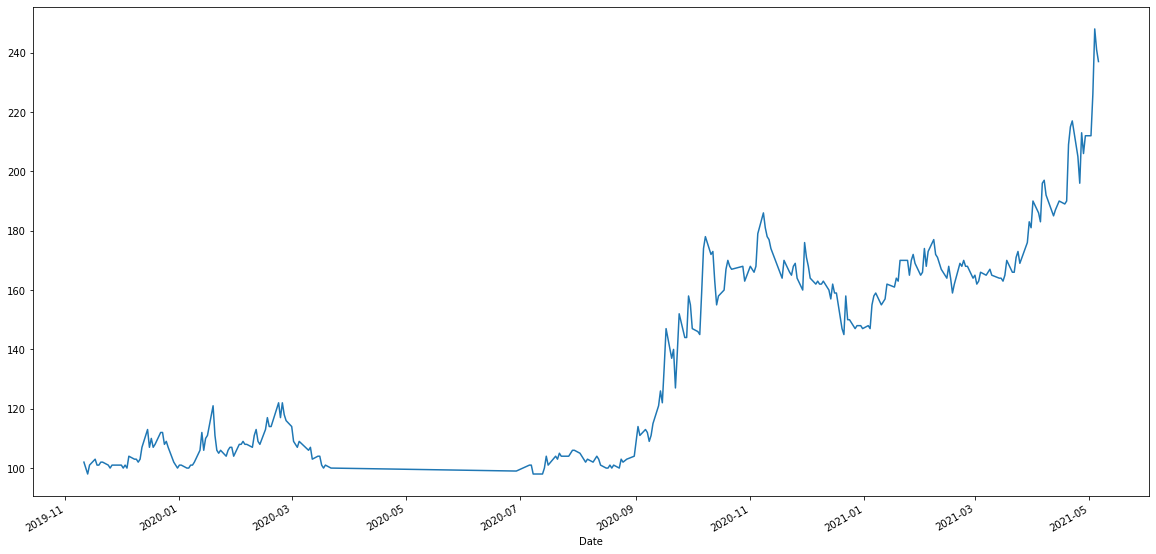

In [90]:
final_df['Close'].plot(figsize = (20,10))

In [92]:
final_df.to_csv("umhl.csv", index = False)